# Project: Investigate TMDB Movies Dataset

## Table of Contents:

<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## Introduction

Movies are always of interest to most of the people. They tend celebrate if movie becomes a hit and gets utterly disappointed if it is a flop. In a way it has become the only recreation for us.
There might be 'n' factors that make the movie a feast to watch like genre, director, actopr, budget etc.
This project is an attempt to get more insights about factors influencing hit/flop movies and also to the analytical skills.

### Questions to be answered

<ol>
<li><a href="#Q1">What properties are associated with high revenue-generating movies?</a></li>
<li><a href="#Q2">Which genres are most popular from year to year?</a></li>
<li><a href="#Q3">Which year has observed highest number of movies?</a></li>
<li><a href="#Q4">Which movies has highest and least profits?</a></li>
<li><a href="#Q5">What are the top 10 movies which has earned the highest profits?</a></li>
<li><a href="#Q6">What were the most popular produced genres in 2000 compared to 2015?</a></li>
<li><a href="#Q7">What are the top 3 factors that movie's profit is dependent on?</a></li>
</ol>

In [39]:
# import the needed modules/packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to limit big values to 2 digits precision

pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

Data wrangling has the following phases:
    <li>Gather</li>
    <li>Assess</li>
    <li>Clean</li>

We will be dealing with each of these phases in detail

### Gather

In this phase we'll be reading the TMDB dataset using the pandas library as shown below.

In [40]:
# read the tmdb csv file

df = pd.read_csv("C:\\Users\\Somesh\\Udacity Projects\\Project-2 Investigate a Dataset\\tmdb-movies.csv")

In [41]:
# display the top 5 rows in tmdb dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


### Assess

Here, we try to understand the dataset i.e find number of rows and columns in the dataset,
check if there are any nulls and duplicates in the dataset etc as performed in below steps.

In [42]:
# understand the basics of the dataset

print(f"Number of rows in dataset are: {df.shape[0]} \n")

print(f"Number of columns in dataset are: {df.shape[1]} \n")

print("Column-wise Details of the dataset are shown below")
print("==================================================\n")
print(df.info())
print("\n")

Number of rows in dataset are: 10866 

Number of columns in dataset are: 21 

Column-wise Details of the dataset are shown below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int6

['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']




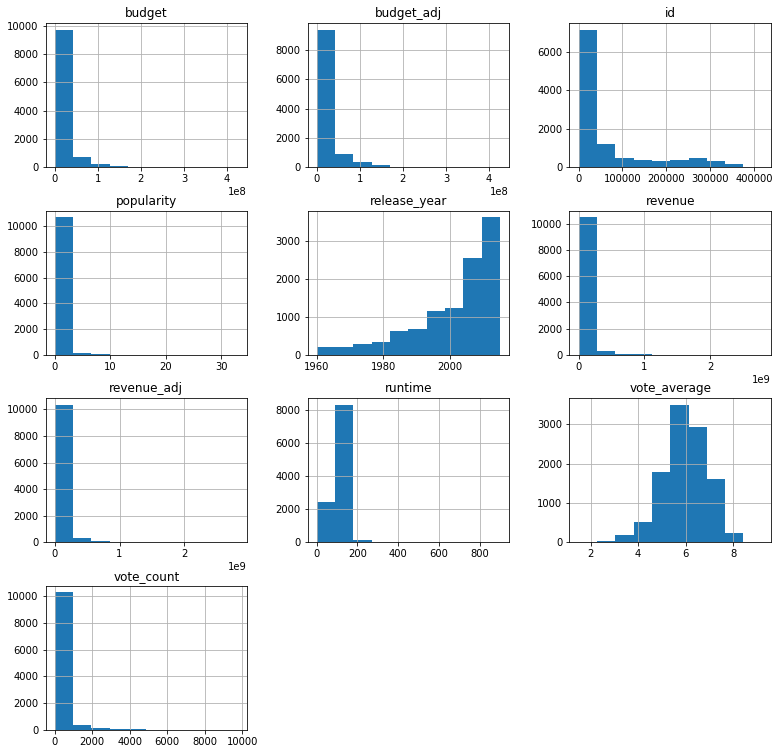

In [43]:
# print the column names with datatypes as int64 and float64

print(list(df.select_dtypes(['int64','float64']).columns))
print("\n")

# check if hiostograms are plotted for all the above columns

df.hist(figsize=(13,13));

In [44]:
# check if there are any null values in the rows

print(f"Null values in the columns are shown below")
print("============================================\n")
print("Column\t\t\t#Nulls")
print("======\t\t\t======")
print(df.isna().sum(axis=0))

Null values in the columns are shown below

Column			#Nulls
======			======
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [45]:
# get the statistics about the dataset

print("Column-wise statistics are shown below")
print("==================================================\n")
print(df.describe())

Column-wise statistics are shown below

             id  popularity       budget       revenue  runtime  vote_count  \
count  10866.00    10866.00     10866.00      10866.00 10866.00    10866.00   
mean   66064.18        0.65  14625701.09   39823319.79   102.07      217.39   
std    92130.14        1.00  30913213.83  117003486.58    31.38      575.62   
min        5.00        0.00         0.00          0.00     0.00       10.00   
25%    10596.25        0.21         0.00          0.00    90.00       17.00   
50%    20669.00        0.38         0.00          0.00    99.00       38.00   
75%    75610.00        0.71  15000000.00   24000000.00   111.00      145.75   
max   417859.00       32.99 425000000.00 2781505847.00   900.00     9767.00   

       vote_average  release_year   budget_adj   revenue_adj  
count      10866.00      10866.00     10866.00      10866.00  
mean           5.97       2001.32  17551039.82   51364363.25  
std            0.94         12.81  34306155.72  144632485.0

#### First impression about the dataset

There are a few columns in the dataset that are not needed to answer our questions and needs to be removed. They are:
<li>keywords</li>
<li>imdb_id</li>
<li>homepage</li>
<li>overview</li>
<li>release_date</li>
<li>tagline</li>

Also, there are a few columns in the dataset which contains multiple entries separated by '|'. They can be found using the analysis shown below. We need to clean them to make our analysis better.

### Clean

In this phase we will handle the issues observed during assessment phase. In this project, cleaning phase includes the following:
<li>Delete the rows with null or 0 values in integer columns</li>
<li>Split the columns containing multiple entries (Separated by '|') and join them</li>
<li>Drop the unneeded columns</li>
<li>Delete duplicate rows if any</li>
<li>Change the column's datatype if needed</li>

#### Delete the rows with null or 0 values in integer columns

In [46]:
# replace 0s in columns with NAN for better analysis

df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

# drop the NAN values in the dataset

df.dropna(axis=0, inplace=True)

#### split the columns containing multiple entries (Separated by '|') and join them

In [47]:
# print the column names containing several values (strings separated by |)
several_values = [col for col in df.select_dtypes(['object']).columns if df[col].str.contains("\|").any() == True]

print(f"Columns containing multiple strings separated by | are: {several_values}")

Columns containing multiple strings separated by | are: ['cast', 'director', 'keywords', 'genres', 'production_companies']


In [48]:
#Seperating columns with several values, split by an '|', into as many columns as needed

df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_director = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_keywords = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_prodcomp = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Check if split produced the results as needed (Check one by one)

df_cast.head(1)
df_director.head(1)
df_keywords.head(1)
df_genres.head(1)
df_prodcomp.head(1)

,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


In [49]:
# join the seperated columns separated by | to original dataframe

df = df.join([df_cast, df_director, df_keywords, df_genres, df_prodcomp])
df.head(1)
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5',
       'director_1', 'director_2', 'director_3', 'director_4', 'director_5',
       'director_6', 'keywords_1', 'keywords_2', 'keywords_3', 'keywords_4',
       'keywords_5', 'genres_1', 'genres_2', 'genres_3', 'genres_4',
       'genres_5', 'production_companies_1', 'production_companies_2',
       'production_companies_3', 'production_companies_4',
       'production_companies_5'],
      dtype='object')

#### Drop the unneeded columns

In [50]:
# drop the unneeded columns

to_drop = ['cast', 'director', 'keywords', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview','release_date', 'tagline']

df.drop(to_drop,axis=1,inplace=True)

#### Delete duplicate rows if any

In [51]:
print(f"No of rows in dataset are: {df.shape[0]} and No of columns in dataset are: {df.shape[1]}")

print(f"\nNo of duplicate rows in the dataset are: {df.duplicated().sum()}")

No of rows in dataset are: 1287 and No of columns in dataset are: 37

No of duplicate rows in the dataset are: 0


#### Change the column's datatype if needed

In [52]:
# Check if all the rows are has correct datatypes

print(df.dtypes)

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

We have made the dataset almost ready to be analyzed.

Let's now look a little deeper into the columns to check if there are any duplicate rows in major columns used for analysis. 

In [53]:
# Check if there are multiple movies with same name

df['original_title'].value_counts().head()

Clash of the Titans     2
Halloween II            2
The Three Musketeers    2
The Thing               2
Halloween               2
Name: original_title, dtype: int64

From above output we see that there are multiple rows with same movie name in 'original_title column'. This seems to be a worrying. Lets take a look at the other column values for the duplicate rows as shown below.

In [54]:
"""Checking column for dubplicated original_title entries"""
"""Checking column for dubplicated original_title entries"""
top_5_titles = df['original_title'].value_counts().index.tolist()
top_5_titles = top_5_titles[:5]
print(f"List of top 5 titles are: {top_5_titles}")
print("\n")

def check_double_titles(names):
    for limit in names:
        df_title = df[df['original_title'] == limit]
        # Get all the rows and column names until original_title column (5th column in dataset)
        print(df_title.iloc[:,:5])
        print("---------------------------------------------------------------------")
        
check_double_titles(top_5_titles)

List of top 5 titles are: ['Clash of the Titans', 'Halloween II', 'The Three Musketeers', 'The Thing', 'Halloween']


         id  popularity       budget      revenue       original_title
1940  18823        2.09 125000000.00 232713139.00  Clash of the Titans
8425  10323        0.20  15000000.00  41092328.00  Clash of the Titans
---------------------------------------------------------------------
         id  popularity      budget     revenue original_title
1546  24150        0.57 15000000.00 39421467.00   Halloween II
8391  11281        0.56  2500000.00 25533818.00   Halloween II
---------------------------------------------------------------------
          id  popularity      budget      revenue        original_title
3425   52451        1.41 75000000.00 132274484.00  The Three Musketeers
10251  10057        0.79 30000000.00  53898845.00  The Three Musketeers
---------------------------------------------------------------------
         id  popularity      budget     revenue origin

Above output makes it clear that though the movie names are same other column values are different i.e content is different for the same movie name. This makes clear that there are no duplicate rows in our dataset. Final size of our dataset can be obtained as shown below.

In [55]:
print(f"No of rows in dataset are: {df.shape[0]} and No of columns in dataset are: {df.shape[1]}")

No of rows in dataset are: 1287 and No of columns in dataset are: 37


<a id='eda'></a>
## Exploratory Data Analysis

This is the key step in the data analysis process where the actual analysis happens. We will apply statistics and create visualizations with the goal of addressing the questions or extracting the information from this dataset. This phase typically consists of two steps:
<li>Explore: Do statistical computations and explore the dataset</li>
<li>Visualize: Plot some nice visualization to show your findings pictorially and to communicate your findings</li>

<a id='Q1'></a>
#### Question-1: What kinds of properties are associated with movies that have high revenues?

In [56]:
# create a copy of the original DataFrame

df_revenue = df

In [57]:
#Performing basic statistic in order to create 4 classifications of the revenue_adj
df_revenue['revenue'].describe()

count         1287.00
mean     176244438.69
std      253815575.82
min             43.00
25%       25650969.50
50%       82087155.00
75%      214069422.00
max     2781505847.00
Name: revenue, dtype: float64

In [58]:
#Bin_edges correspond to min - max entries in previous cell. Quantiles are lables by bin_names.
#new column 'revenue_level' is created to classify columns based on revenues

bin_edges = [43.00,25650969.50,82087155.00,214069422.00,2781505847.00]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_category'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [59]:
# list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_category'].unique()
revenue_category = df_revenue['revenue_category'].unique().tolist()
del revenue_category[-1]

In [60]:
revenue_category

['high', 'medium', 'low', 'very low']

In [61]:
#nested dictionary is created with 8 attributes based on revenue_categories

movie_data = {}

for category in revenue_category:
    
    # get the data specific to a revenue category i.e high, medium, low, very low
    grouped_data = df_revenue[df_revenue['revenue_category'] == category]
    
    # to know who the frequent director is for specific to the revenue_category
    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts().idxmax()
        
    # to know who the frequent cast is specific to the revenue category
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts().idxmax()
    
    # to know the mnost frequent genre specific to the revenue category
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()
        
    # to know the frequent production company specific to the revenue category
    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts().idxmax()
    
    # to understand in which release year high revenue movies were made 
    release_year = grouped_data['release_year'].value_counts().idxmax()
    
    # compute averages for specific revenue category
    
    avg_duration = grouped_data['runtime'].mean()
    
    avg_budget = grouped_data['budget_adj'].mean()
    
    avg_vote = grouped_data['vote_average'].mean()
    
    # creating a dictionary with all fields specific to a category
    
    movie_data[category] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [62]:
#transforming nested dictionary into dataframe

movie_classes = []

frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                                 119.71
         frequent_director                  Steven Spielberg
         avg_budget                             110163087.75
         avg_vote                                       6.63
         frequent_cast                            Tom Cruise
         frequent_genres                           Adventure
         release_year                                   2010
         frequent_production_companies          Warner Bros.
medium   avg_duration                                 110.33
         frequent_director                      Dennis Dugan
         avg_budget                              54343803.46
         avg_vote                                       6.21
         frequent_cast                         Mark Wahlberg
         frequent_genres                               Drama
         release_year                                   2011
         frequent_production_companies    Universal Pictures
low      avg_duration                                 106.89
         frequent_director                    John Carpenter
         avg_budget                              30246027.48
         avg_vote                                       6.18
         frequent_cast                  Joseph Gordon-Levitt
         frequent_genres                               Drama
         release_year                                   2011
         frequent_production_companies    Universal Pictures
very low avg_duration                                 102.75
         frequent_director                    John Carpenter
         avg_budget                              15897332.75
         avg_vote                                       6.03
         frequent_cast                         Colin Farrell
         frequent_genres                               Drama
         release_year                                   2010
         frequent_production_companies          Warner Bros.

In [63]:
df_revenue.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.00,0.19,-0.05,-0.03,-0.01,0.06,0.00,0.49,-0.12,-0.10
popularity,0.19,1.00,0.43,0.59,0.32,0.74,0.36,0.06,0.42,0.55
budget,-0.05,0.43,1.00,0.71,0.34,0.58,0.08,0.18,0.99,0.57
revenue,-0.03,0.59,0.71,1.00,0.37,0.78,0.30,0.03,0.71,0.91
runtime,-0.01,0.32,0.34,0.37,1.00,0.43,0.39,-0.07,0.36,0.37
vote_count,0.06,0.74,0.58,0.78,0.43,1.00,0.46,0.07,0.57,0.70
vote_average,0.00,0.36,0.08,0.30,0.39,0.46,1.00,-0.16,0.09,0.32
release_year,0.49,0.06,0.18,0.03,-0.07,0.07,-0.16,1.00,0.06,-0.23
budget_adj,-0.12,0.42,0.99,0.71,0.36,0.57,0.09,0.06,1.00,0.61
revenue_adj,-0.10,0.55,0.57,0.91,0.37,0.70,0.32,-0.23,0.61,1.00


<a id='Q2'></a>
#### Question 2: Which genres are most popular from year to year?

In [64]:
# get genre_1 to genre_5 columns with all rows into a datframe

df_genre = df.loc[:,'genres_1':'genres_1']

# append the column release_year to Genres dataframe and make it a separate dataframe

df_genres_dates = df_genres.join(df['release_year'])

In [65]:
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common_list = [] #creates a list of tuples for most common genres in specific years

#for loop to create most_common list

for year in years:
    
    # Creates a dataframe for genres for a specific year
    a = df_genres_dates[df_genres_dates['release_year'] == year]
    
    # drop "release_year" column to perferm stack and value count in next line
    b = a.drop(['release_year'], axis = 1)
    
    # performs stack and value count through genres_1 - genres_5 and stores the index of maximum count
    most_produced_genre = b.stack().value_counts().idxmax() 

    # creates a regular DataFrame for respective years
    x = df[df['release_year'] == year]
    
    # creates the mean of vote_average and stores the index of maximum value
    most_voted_genre = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    
    # check if the maximum produced genre is equal to highest voted genre
    if most_produced_genre == most_voted_genre:
        is_equal = 'Equal'
    else:
        is_equal = 'Not equal'
    
    #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common_list.append((year, most_produced_genre, most_voted_genre, is_equal))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common_list, columns=['release_year', 'most_produced_genre', 'most_voted_genre', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,most_produced_genre,most_voted_genre,is_equal
0,1961,Family,Comedy,Not equal
1,1962,Adventure,Adventure,Equal
2,1963,Adventure,Action,Not equal
3,1964,Music,Adventure,Not equal
4,1965,Adventure,Adventure,Equal
5,1967,Adventure,Action,Not equal
6,1969,Adventure,Adventure,Equal
7,1971,Thriller,Action,Not equal
8,1972,Crime,Drama,Not equal
9,1973,Thriller,Drama,Not equal


In [66]:
df_most_popular['is_equal'].value_counts()

Not equal    41
Equal        10
Name: is_equal, dtype: int64

<a id='Q3'></a>
#### Question-3: Which year has observed highest number of movies?

Maximum number of movies were released in the year 2011


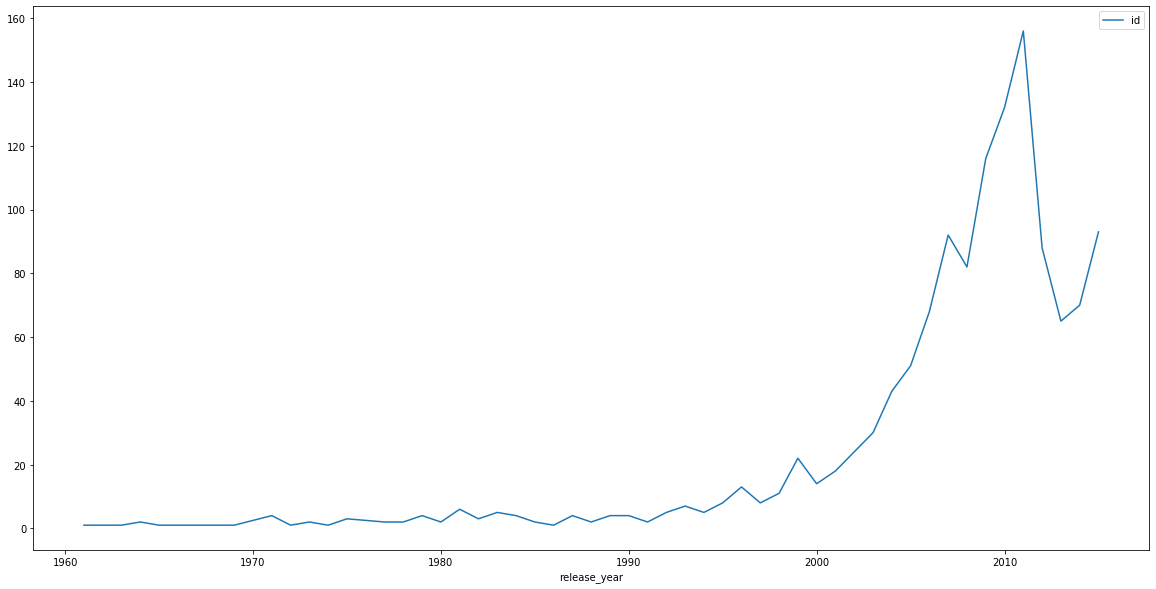

In [67]:
df.groupby(['release_year'])['id'].count().plot(legend=True);

print(f"Maximum number of movies were released in the year {df.groupby(['release_year'])['id'].count().idxmax()}")

<a id='Q4'></a>
#### Question-4: Which movies has highest and least profits?

In [68]:
# create a profit column by subtracting budget from revenue

df['profit'] = df['revenue'] - df['budget']

In [69]:
def findMinMax(profit):
    min_profit = df[profit].idxmin()
    max_profit = df[profit].idxmax()
    
    min_profit_row = pd.DataFrame(df.loc[min_profit,:])
    max_profit_row = pd.DataFrame(df.loc[max_profit,:])
    
    print(f"Max profits are gained for the movie: {df['original_title'][max_profit]}")
    print(f"Min profits are gained for the movie: {df['original_title'][min_profit]}")
    
    return pd.concat([min_profit_row, max_profit_row],axis=1)

findMinMax('profit')

Max profits are gained for the movie: Avatar
Min profits are gained for the movie: The Warrior's Way


,2244,1386
id,46528,19995
popularity,0.25,9.43
budget,425000000.00,237000000.00
revenue,11087569.00,2781505847.00
original_title,The Warrior's Way,Avatar
runtime,100.00,162.00
vote_count,74,8458
vote_average,6.40,7.10
release_year,2010,2009
budget_adj,425000000.00,240886902.89


<a id='Q5'></a>
#### Question-5: What are the top 10 movies which has earned the highest profits?

Top 10 profitable movies are: 
Avatar
Star Wars: The Force Awakens
Titanic
Jurassic World
Furious 7
The Avengers
Harry Potter and the Deathly Hallows: Part 2
Avengers: Age of Ultron
Frozen
Minions


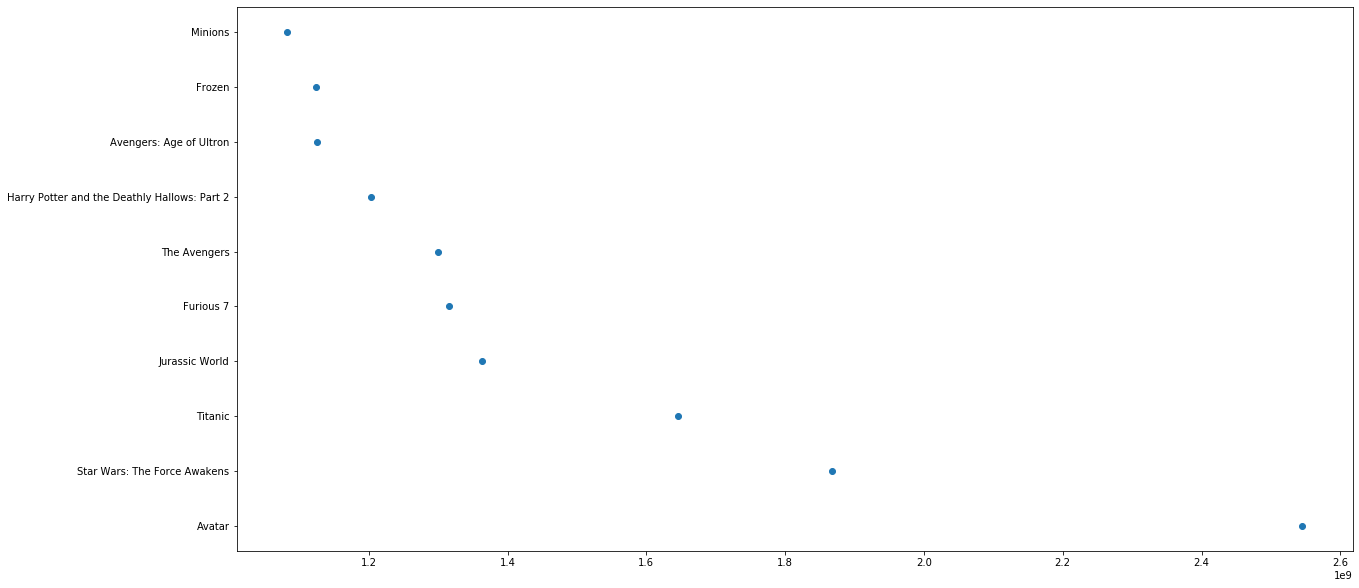

In [78]:
# create a new dataframe for profits by sorting them in descending order

df_profit = pd.DataFrame(df['profit'].sort_values(ascending = False))

# add original title column to the newly created profit dataframe

df_profit['original_title'] = df['original_title']

data = list(map(str, (df_profit['original_title'])))

#print(data)

x = list(data[:10])

y = list(df_profit['profit'][:10])

print("Top 10 profitable movies are: ")

print("=================================")

for movie in x:
    print(f"{movie}")

plt.scatter(x=y,y=x)

plt.show()

<a id='Q6'></a>
#### Question-6: What were the most popular produced genres in 2000 compared to 2015?

In [71]:
# create a copy of dataset for the release_year 2015

df_2015 = df_genres_dates[df_genres_dates['release_year'] == 2015].copy()

# drop release_year column as we don't need it

df_2015.drop('release_year',axis=1, inplace=True)

# apply value_counts across genre columns

df_2015 = df_2015.stack().value_counts()

df_2015

Drama              38
Thriller           32
Action             28
Adventure          27
Comedy             25
Science Fiction    22
Crime              16
Horror             12
Fantasy            10
Mystery             9
Romance             9
Family              8
Animation           7
Music               3
War                 2
Western             2
History             2
dtype: int64

In [72]:
# create a copy of dataset for the release_year 2000

df_2000 = df_genres_dates[df_genres_dates['release_year'] == 2000].copy()

# drop release_year column

df_2000.drop('release_year',axis=1, inplace=True)

# apply value_counts across genre columns

df_2000 = df_2000.stack().value_counts()

df_2000

Thriller           7
Action             6
Comedy             5
Drama              4
Adventure          3
Family             3
Science Fiction    2
Fantasy            2
Romance            1
Mystery            1
War                1
dtype: int64

In [73]:
# compare index of both dataframes

df_2015.index.sort_values(),df_2000.index.sort_values()

# add below genres to 2000 year so that 2000 & 2015 has an equal match

df_2000['Animation'] = 0
df_2000['Crime'] = 0
df_2000['History'] = 0
df_2000['Horror'] = 0
df_2000['Music'] = 0
df_2000['Western'] = 0

# update DataFrames to sort by index

df_2015 = df_2015.sort_index()
df_2000 = df_2000.sort_index()

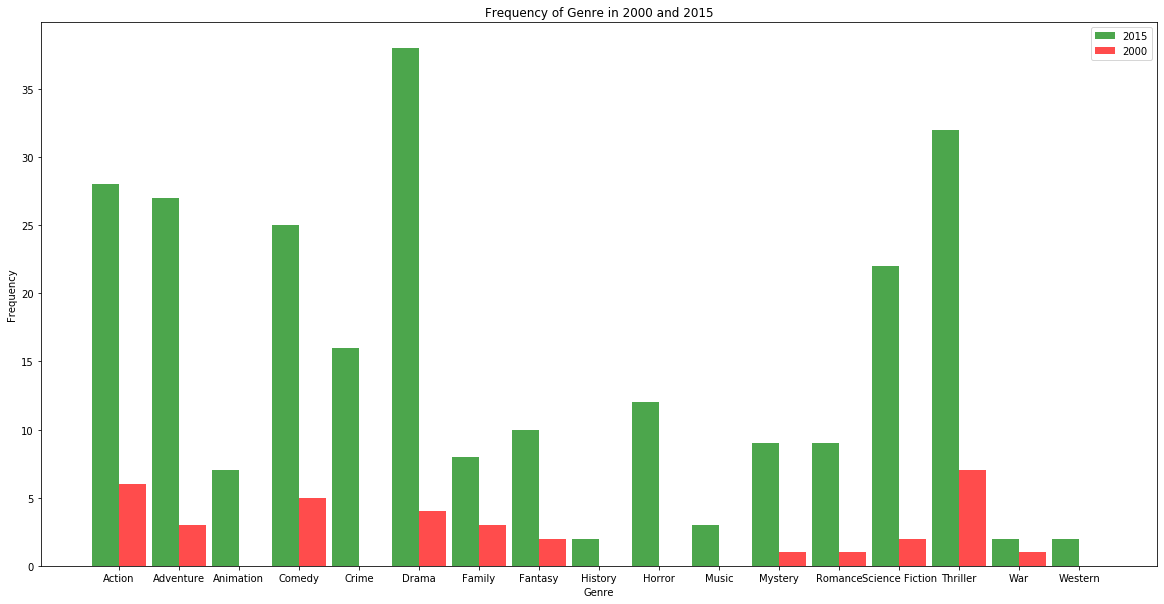

In [74]:
# create a bar plot for 2000 & 2015 genres

labels = df_2000.index.sort_values()

# x-axis locations

ind = np.arange(len(df_2015))
width = 0.45       # the width of the bars

# plot bars

plt.bar(ind, df_2015, width, color='g', alpha=.7, label='2015')
plt.bar(ind + width, df_2000, width, color='r', alpha=.7, label='2000')

# title and labels

plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.title('Frequency of Genre in 2000 and 2015')
locations = ind + width / 2  # xtick locations
labels = labels # xtick labels
plt.xticks(locations, labels)
plt.rcParams["figure.figsize"] = (20,10)
plt.legend();

<a id='Q7'></a>
#### Question-7: What are the top 3 factors that movie's profit is dependent on?

Top 3 features that profit is dependent on are revenue       0.98
revenue_adj   0.92
vote_count    0.75
popularity    0.58
Name: profit, dtype: float64


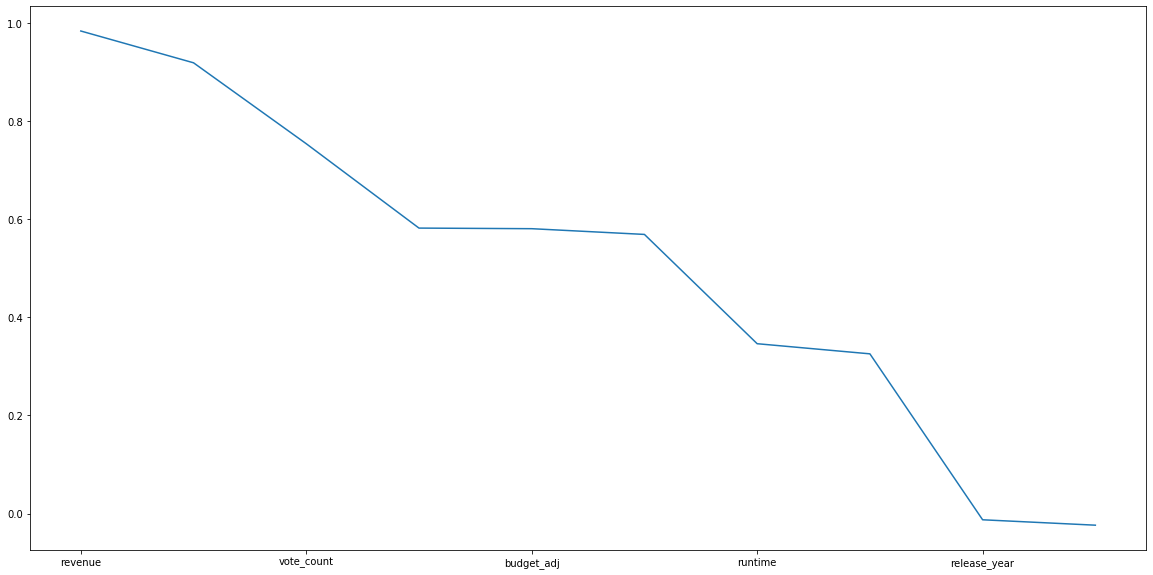

In [75]:
# compute the correlation coefficient of all columns with profit column

df.corr()['profit'].sort_values(ascending=False)[1:].plot();

print(f"Top 3 features that profit is dependent on are {df.corr()['profit'].sort_values(ascending=False)[1:5]}")


<a id='conclusions'></a>
## Conclusion

The first question "What properties are associated with high revenue-generating movies?" shows interesting result. The numeric columns of "popularity, budget and vote_count" show the highest correlations. One may think that a movie with higher budget will receive higher revenue, but, the correlation is not on a very high. 'vote_count' is indicating that the more people vote for a movie that has higher revenue. Most probably, this is not a good indicator for high budget movies. High revenue movies indicate that they are most commonly directed by Steven Spielberg, casting Tom Cruise and contain the genre Adventure.

The second question "Which genres are most popular from year to year?" has shown surprising results, as the most popular genre differed a lot. Only in 10 occasions most frequently produced genres was also voted as best genre by the audience and the two differed for rest of the 41 years.

The third question "Which year has observed highest number of movies?" has showed that most movies were released in the year 2011. A scatter plot is also drawn to show the number of movies released in each year.

The fourth question "Which movies has highest and least profits?" has the following answers. Most profits were gained for the movie 'Avatar', while the least profit was made for the movie 'The Warrior's Way'. A detailed comparison is shown for the other properties of this movie to show what's lacking in the latter.

To answer the fifth question "What are the top 10 movies which has earned the highest profits?" a plot is drawn for the Top 10 profitable movies alongside of their profits.

The sixth question "What were the most popular produced genres in 2000 compared to 2015?" indicate that in the year 2015 dramas were by far the most frequently produced movies, followed by thrillers and action. In 2000 the most frequent produced genre was thriller, followed by action and comedies. The bar chart also indicates that in 2015 much more movies were produced compared to the year 2000.

The seventh question "What are the top 3 factors that movie's profit is dependent on?" has shown that movie's profit is mostly dependent on 'revenue', 'vote_count' and 'popularity' columns.